# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
mars_table = soup.find('table', class_='table')
rows = mars_table.find_all('tr')[1:]    # Skipping the first row for header

mars_data = []    # Creating an empty list to store row data  
for row in rows:
    cols = row.find_all('td')   # Find all columns in a row
    rows_data = [col.text.strip() for col in cols]  # Extract rows and clean spaces
    mars_data.append(rows_data)

mars_data[:5]

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_pd = []

rows = mars_table.find_all('tr')[1:]    # Skipping header

# Loop through the scraped data to create a list of rows
for row in rows:
    cols = row.find_all('td')   #Extract data from each cell
    rows_data = [col.text.strip() for col in cols]
    mars_pd.append(rows_data)   # Append the row data to the mars_pd list

print(mars_pd[:5])



[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

mars_pd = pd.DataFrame(mars_pd, columns=columns)    # Create the dataframe

In [8]:
# Confirm DataFrame was created successfully
mars_pd.head() 

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_pd.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_pd['id'] = mars_pd['id'].astype(int)
mars_pd['terrestrial_date'] = pd.to_datetime(mars_pd['terrestrial_date'])   # converting string obj to datetime
mars_pd['sol'] = mars_pd['sol'].astype(int)
mars_pd['ls'] = mars_pd['ls'].astype(int)
mars_pd['month'] = mars_pd['month'].astype(int)
mars_pd['min_temp'] = mars_pd['min_temp'].astype(float)
mars_pd['pressure'] = mars_pd['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
mars_pd.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
   Answer: There are 12 months on mars.

2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
   Answer: 1867 sols are present in the dataset.

3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
    Answer: The coldest month on mars is month 3 (March?).  
	        The hottest month on mars is month 8 (August). 

4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
    Answer: Month 6 (June) has the lowest atmospheric pressure on mars.
	        Month 9 (September) has the highest atmospheric pressure on mars.

5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.
    Answer:  From the days between the coldest point in 2014 to the coldest point in 2016 (the difference between  the two coldest points in the graph), there are roughly 726 days apart. This shows a martian year is roughly 726 days apart.


In [12]:
# 1. How many months are there on Mars?
mars_months = mars_pd['month'].nunique()
print(f"there are {mars_months} months on mars ")


there are 12 months on mars 


In [13]:
# 2. How many sols (Martian days) worth of data are there?
mars_days = mars_pd['sol'].nunique()
print(f"there are {mars_days} sols on mars")

there are 1867 sols on mars


In [14]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_pd.groupby('month')['min_temp'].mean()

print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


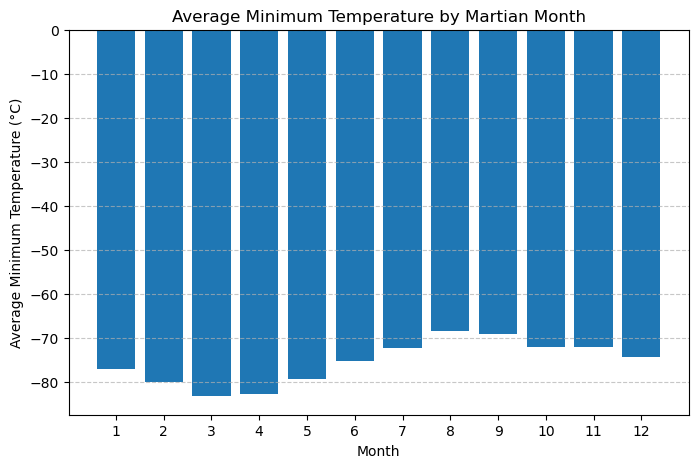

In [15]:
# Plot the average minimum temperature by month
plt.figure(figsize=(8,5))
plt.bar(avg_min_temp.index, avg_min_temp.values)
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Average Minimum Temperature by Martian Month")
plt.xticks(range(1, 13))  # Ensure months are labeled correctly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

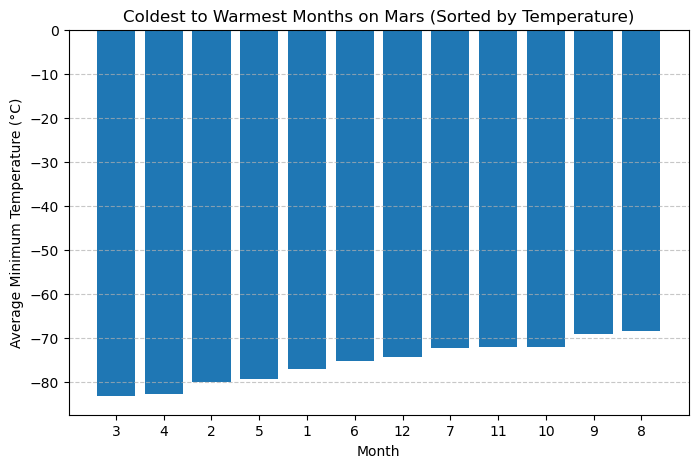

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sorted_avg_min_temp = avg_min_temp.sort_values(ascending=True)  # Sort months by their average minimum temperature (coldest to hottest)

sorted_months = sorted_avg_min_temp.index.astype(str)   # Convert the index (months) to strings to prevent reordering

# Plot the sorted data
plt.figure(figsize=(8,5))
plt.bar(sorted_months, sorted_avg_min_temp.values)
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Coldest to Warmest Months on Mars (Sorted by Temperature)")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_pd.groupby('month')['pressure'].mean()

print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


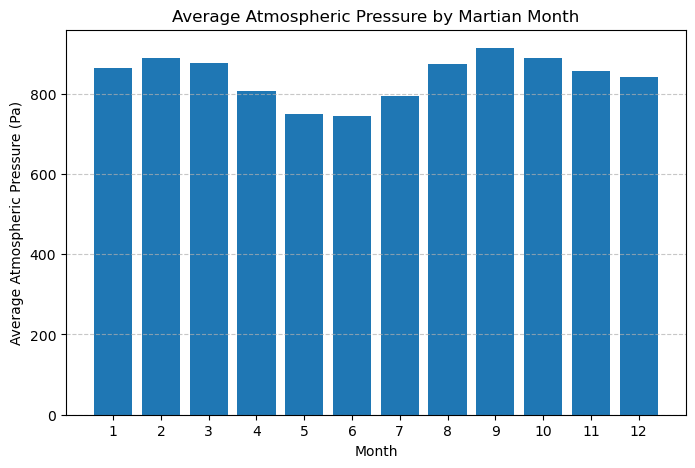

In [18]:
# Plot the average pressure by month
avg_pressure_by_month = mars_pd.groupby('month')['pressure'].mean() # average the pressure by month

plt.figure(figsize=(8,5))
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values)
plt.xlabel("Month")
plt.ylabel("Average Atmospheric Pressure (Pa)")
plt.title("Average Atmospheric Pressure by Martian Month")
plt.xticks(range(1, 13))  # Ensure months are labeled correctly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

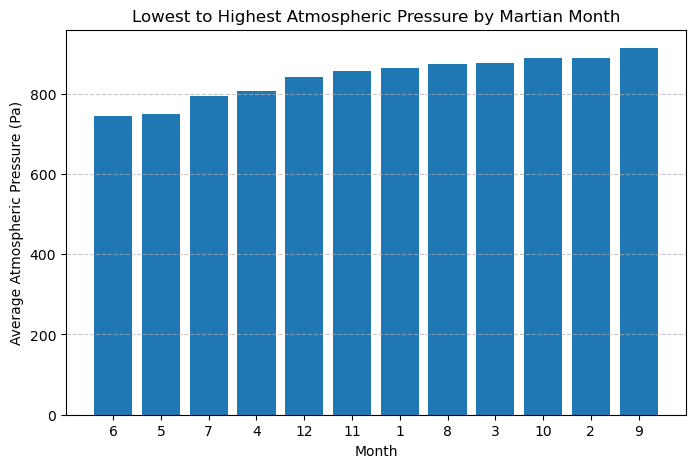

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

sorted_avg_pressure = avg_pressure_by_month.sort_values(ascending=True)

sorted_pressure_months = sorted_avg_pressure.index.astype(str)  # Convert month numbers to strings to prevent Matplotlib from reordering them

# Plot the bar chart
plt.figure(figsize=(8,5))
plt.bar(sorted_pressure_months, sorted_avg_pressure.values)
plt.xlabel("Month")
plt.ylabel("Average Atmospheric Pressure (Pa)")
plt.title("Lowest to Highest Atmospheric Pressure by Martian Month")
plt.xticks(sorted_pressure_months)  # Ensure months are labeled correctly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


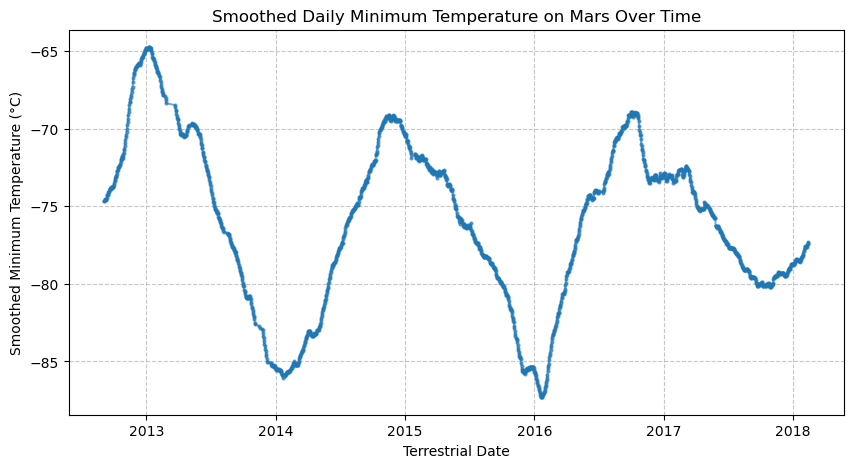

In [20]:
# Apply a rolling mean to smooth out temperature fluctuations (window of 30 days)
mars_pd['smoothed_temp'] = mars_pd['min_temp'].rolling(window=30, center=True).mean()

# Plot the smoothed temperature trend
plt.figure(figsize=(10,5))
plt.plot(mars_pd['terrestrial_date'], mars_pd['smoothed_temp'], marker='o', linestyle='-', markersize=2, alpha=0.6)

# Labels and title
plt.xlabel("Terrestrial Date")
plt.ylabel("Smoothed Minimum Temperature (°C)")
plt.title("Smoothed Daily Minimum Temperature on Mars Over Time")

# Grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [21]:
# Filter data for the years 2014 to 2016
filtered_mars_pd = mars_pd[(mars_pd['terrestrial_date'] >= '2014-01-01') & 
                           (mars_pd['terrestrial_date'] <= '2016-12-31')]

# Apply a rolling mean to smooth out temperature fluctuations (30-day window)
filtered_mars_pd.loc[:, 'smoothed_temp'] = filtered_mars_pd['min_temp'].rolling(window=30, center=True).mean()


# Find the coldest point in 2014
coldest_2014 = filtered_mars_pd[
    (filtered_mars_pd['terrestrial_date'] >= '2014-01-01') & 
    (filtered_mars_pd['terrestrial_date'] <= '2014-12-31')
].nsmallest(1, 'smoothed_temp')

# Find the earliest coldest point in 2016 that is at least 200 Earth days after 2014
coldest_2016_candidates = filtered_mars_pd[
    (filtered_mars_pd['terrestrial_date'] >= '2016-01-01')
].nsmallest(5, 'smoothed_temp')  # Take 5 coldest points and filter from there

# Ensure we get the first unique cold point after 2014
first_coldest_date = coldest_2014['terrestrial_date'].values[0]
latest_coldest_date = coldest_2016_candidates[
    coldest_2016_candidates['terrestrial_date'] > first_coldest_date + pd.Timedelta(days=200)
]['terrestrial_date'].min()

# Calculate the estimated Martian year length in Earth days
martian_year_days = (latest_coldest_date - first_coldest_date).days

# Print the estimated Martian year length
print(f"Estimated length of a Martian year (coldest points from 2014 to 2016): {martian_year_days} Earth days")
print(first_coldest_date)
print(latest_coldest_date)

Estimated length of a Martian year (coldest points from 2014 to 2016): 726 Earth days
2014-01-23T00:00:00.000000000
2016-01-19 00:00:00


#### Minimum Temperature

The coldest temperature is -90 celsius.

#### Atmospheric Pressure

Which months have the lowest and the highest atmospheric pressure on Mars? 
Answer:  Month 6 (June) has the lowest atmospheric pressure on mars.
	     Month 9 (September) has the highest atmospheric pressure on mars.

#### Year Length

About how many terrestrial (Earth) days exist in a Martian year? 
Answer:  From the days between the coldest point in 2014 to the coldest point in 2016 (the difference between the    two coldest points in the graph), there are roughly 726 days apart. This shows a martian year is roughly 726 days apart.
	 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV


In [23]:
browser.quit()